In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


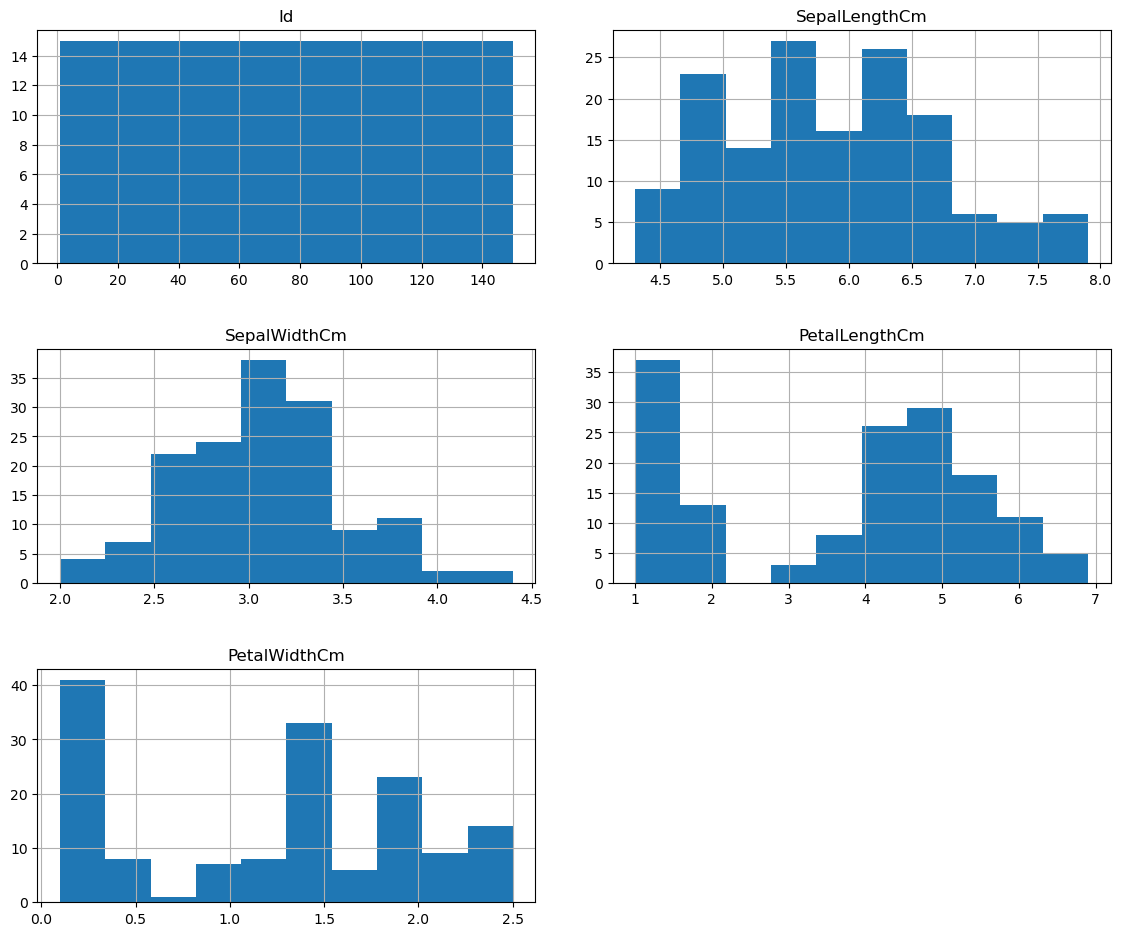

In [10]:
df.hist(figsize=(12, 10), bins=10)  # You can adjust bins as needed
plt.tight_layout(pad=3.0)  # pad controls space between subplots
plt.show()

In [6]:
sort_data = np.sort(df['SepalLengthCm'])
mean = np.mean(df['SepalLengthCm'])
std = np.std(df['SepalLengthCm'])
outliers=[]
for x in sort_data:
    z = (x - mean)/std
    if z >2:
        outliers.append(x)
        
print(outliers)

[7.6, 7.7, 7.7, 7.7, 7.7, 7.9]


In [7]:
sort_data2 = np.sort(df['SepalWidthCm'])
Q1 = np.percentile(sort_data2, 25, interpolation='midpoint')
Q3 = np.percentile(sort_data2, 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Q1 : ",Q1, "\n", "Q3: ",Q3)
print("inter quartile range : ", IQR)
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('low_limit is', low_limit)
print('up_limit is', up_limit)

outliers = []
for x in sort_data2:
    if ((x < low_limit) or (x > up_limit)):
        outliers.append(x)
        
print(outliers)

Q1 :  2.8 
 Q3:  3.3
inter quartile range :  0.5
low_limit is 2.05
up_limit is 4.05
[2.0, 4.1, 4.2, 4.4]


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

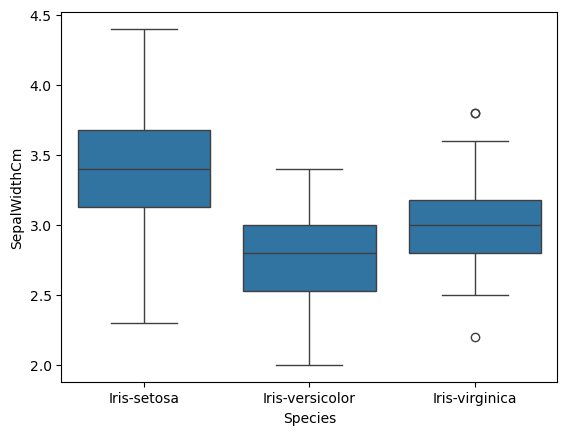

In [8]:
sbn.boxplot(data=df, x='Species', y='SepalWidthCm')

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

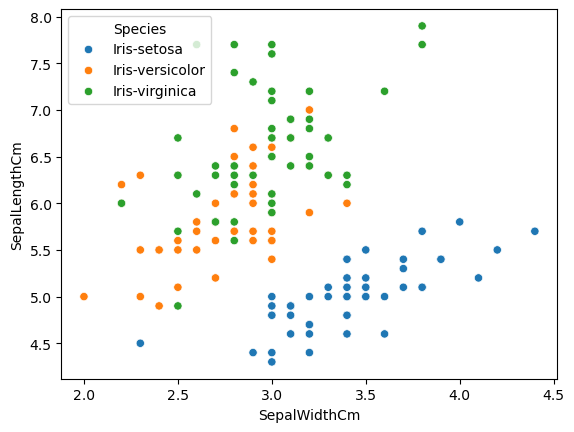

In [9]:
sbn.scatterplot(data=df, x='SepalWidthCm', y='SepalLengthCm', hue='Species')